In [1]:
# importing necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt

# function that creates a random NxN grid
def initialise_grid(N,n):
    x = np.zeros((N,N))
    counter = 0
    while counter < n:
        # using the randint, random function to assign random intigers in the given range
        i = random.randint(0,N-1)
        j = random.randint(0,N-1)
        if x[i][j] == 0:
            x[i][j] = 1
            counter += 1
    counter = 0
    while counter < n:
        i = random.randint(0,N-1)
        j = random.randint(0,N-1)
        if x[i][j] == 0:
            x[i][j] = 2
            counter += 1
    return x


[[0. 1. 2. 0. 2.]
 [1. 0. 1. 0. 1.]
 [2. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 1.]]


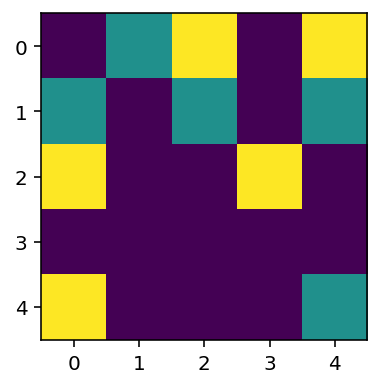

In [2]:
# test case
grid = initialise_grid(5, 5)

print(grid)


plt.figure(figsize=(3,3))
plt.imshow(grid)
plt.show()

In [3]:
# function that finds neighbours of the same type
def neighbours_same(x, i, j):
    count = 0
    for row in range(i-1, i+2):
        for col in range(j-1, j+2):
            # it goes over every neighbour of the given co-ordinate besides the co-ordinate itself, in the given dimension of the array, and increases the count when the species match
            if (row != i or col != j) and 0 <= row < len(x) and 0 <= col < len(x[0]) and x[row][col] == x[i][j]:
                count += 1
    return count


In [4]:
# test case
x_test = np.array([[2, 2, 1, 2, 1],
                   [0, 1, 1, 1, 1],
                   [2, 2, 0, 0, 0],
                   [2, 1, 2, 2, 2],
                   [2, 1, 1, 0, 1]])

print(neighbours_same(x_test, 0, 0))
print(neighbours_same(x_test, 0, 1))
print(neighbours_same(x_test, 1, 0))
print(neighbours_same(x_test, 1, 1))

1
1
0
2


In [5]:
# function that find the total number of non zero neighbours 
def neighbours_total(x, i, j):
    count = 0
    for row in range(i-1, i+2):
        for col in range(j-1, j+2):
             # it goes over every neighbour of the given co-ordinate besides the co-ordinate itself, in the given dimension of the array, and increases the count when the cells are not empty
            if (row != i or col != j) and 0 <= row < len(x) and 0 <= col < len(x[0]) and x[row][col] != 0:
                count += 1
    return count


In [6]:
# test case
print(neighbours_total(x_test, 0, 0))
print(neighbours_total(x_test, 0, 1))
print(neighbours_total(x_test, 1, 0))
print(neighbours_total(x_test, 1, 1))

2
4
5
6


In [7]:
# function which find dissatisfied cells
def get_dissatisfied_cells(x,f):
    i,j = x.shape
    satisfaction_matrix = np.zeros((i,j))
    for row in range(i):
        for col in range(j):
            # it goes over the whole array and takes in non empty cells, then using the previous functions it compares the neighbours of the fiven cells to a fraction of satisfaction and if it is lower it deems is unsatisfied. it also makes sure it doesnt divide by zero in certain cases
            if x[row][col] != 0 and neighbours_total(x, row, col) != 0 and neighbours_same(x, row, col)/neighbours_total(x, row, col) < f:
                satisfaction_matrix[row][col] = 1
    return satisfaction_matrix

In [8]:
# test case
f = 0.4
print(get_dissatisfied_cells(x_test, f))

[[0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1.]]


In [9]:
# function that finds empty cells
def find_empty_cells(array):
    # takes in an array and using numpy where function takes the indixes of empty cells, stores them in a list and using zip function assigns them in a row/col shape so they represent co-ordinates and are ready for use.
    empty_cells = np.where(array == 0)
    return list(zip(empty_cells[0], empty_cells[1]))

In [10]:
# function which finalises the array with the incorporation of movement of the dissatisfied cells to a better location
def advance(x, f):
    i,j = x.shape
    result = np.zeros((i,j))
    satisfaction = get_dissatisfied_cells(x, f)
    for row in range(i):
        for col in range(j):
            # here it goes over the satisfaction matrix and if theres any zeros, it switches their value with the value of result array
            if satisfaction[row][col] == 0:
                result[row][col] = x[row][col]

    empty_cells = find_empty_cells(result)
    for row in range(i):
        for col in range(j):
            # here if the satisfaction matrix has a 1, advance takes the disatisfied cell, and assigns it a new place via the random choice function witch takes the co-ordinate values from the list created by the find_empty_cells function
            if satisfaction[row][col] == 1:
                empty_coordinate = random.choice(empty_cells)
                result[empty_coordinate[0],empty_coordinate[1]] = x[row][col]
                empty_cells.remove(empty_coordinate)
    return result
            
                

In [11]:
# test case
f = 0.3
print(advance(x_test, f))

[[2. 0. 1. 1. 1.]
 [2. 1. 1. 1. 1.]
 [2. 2. 0. 0. 2.]
 [2. 1. 2. 2. 2.]
 [2. 1. 1. 0. 0.]]


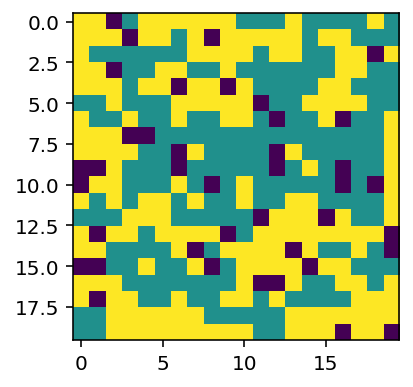

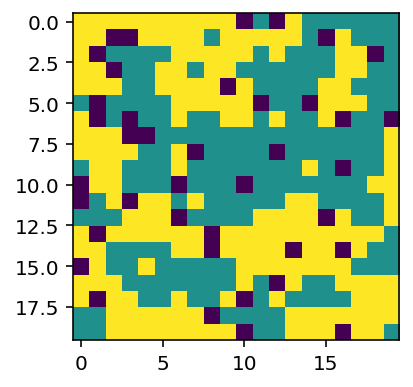

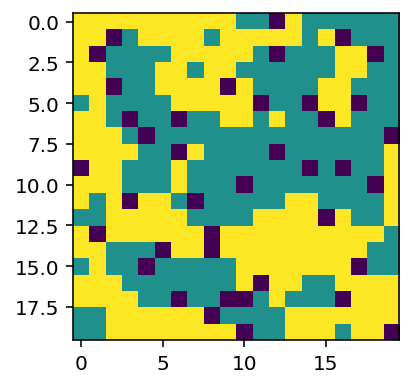

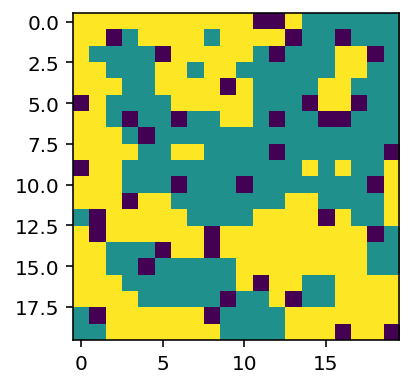

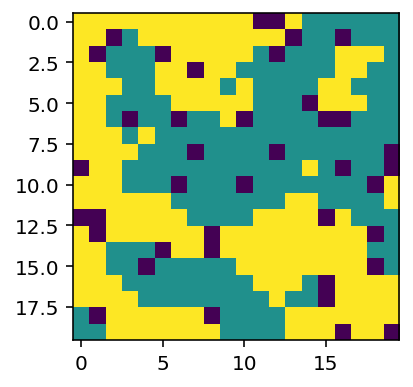

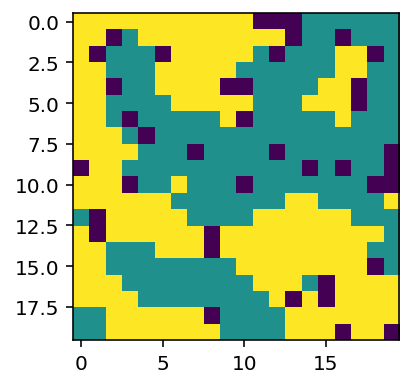

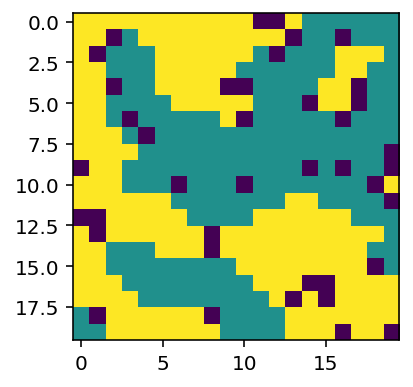

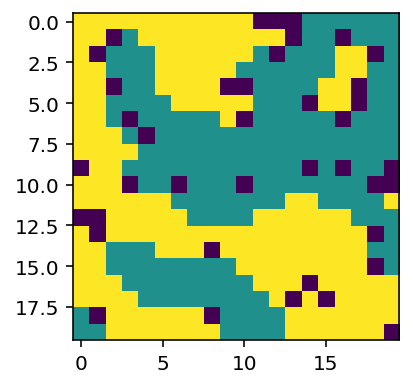

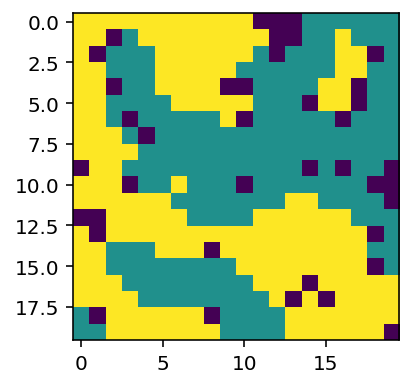

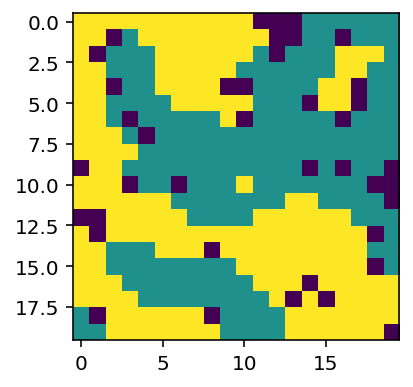

In [30]:
# modelling a 20x20 grid with an of 0.4 to see the effect 
model = initialise_grid(20,180)
counter = 0
f = 0.4

while counter < 10:
    model = advance(model, f)
    plt.figure(figsize = (3,3))
    plt.imshow(model)
    plt.show()
   
    counter += 1
    

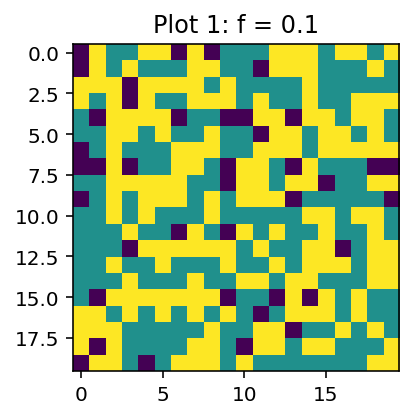

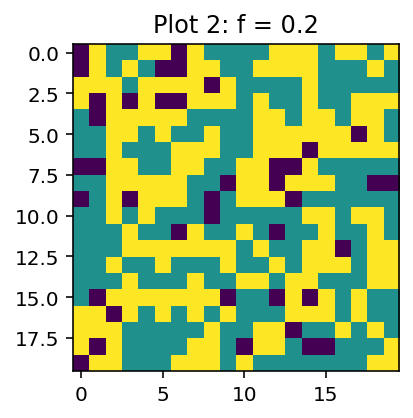

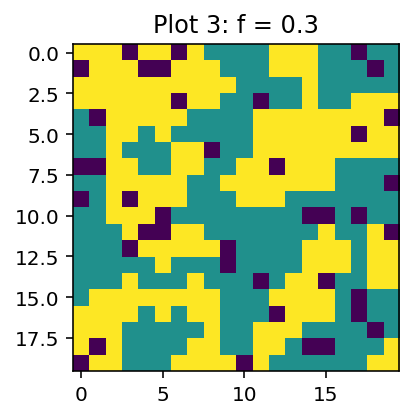

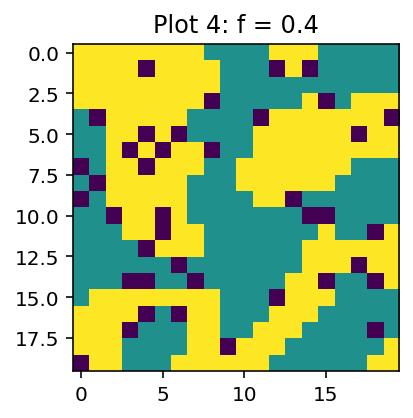

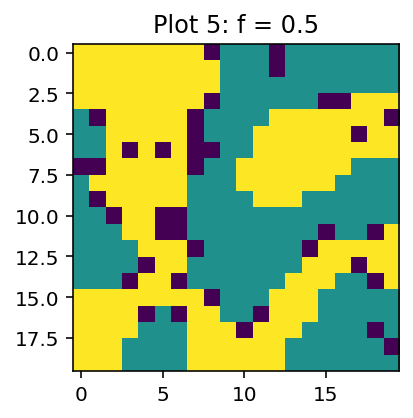

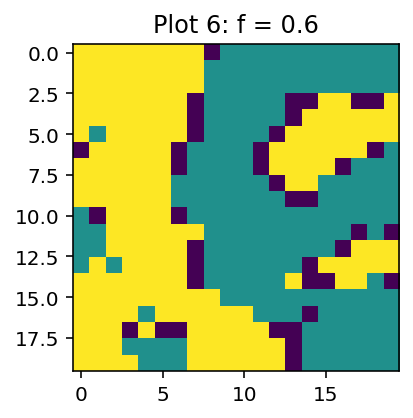

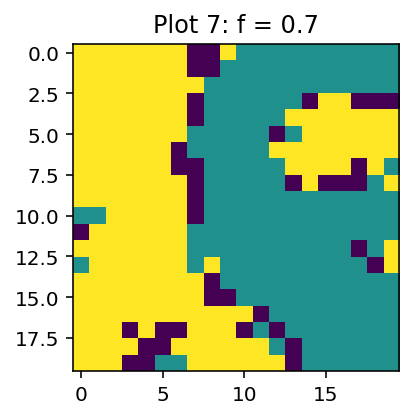

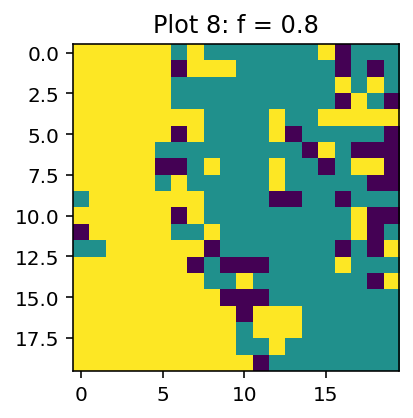

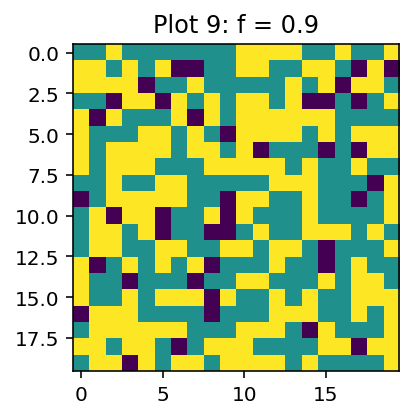

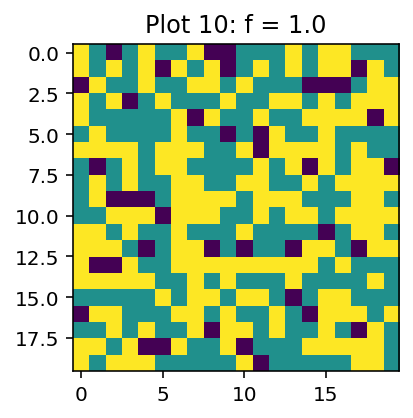

In [14]:
t = initialise_grid(20,180)
c = 0
f = 0.1
plot_num = 1

while f < 1:
    c = 0
    while c < 10:
        t = advance(t, f)
        c += 1
    plt.figure(figsize = (3,3))
    plt.imshow(t)
    plt.title("Plot " + str(plot_num) + ": f = " + str(round(f, 3)))
    plt.show()
    f += 0.1
    plot_num += 1


If you look at the figures above, you have 10 plots which depict different patterns of stability of the model with the respective values of f in ascending order.

After looking at these figures, we can see a direct correlation of stability of the distribution with the value of f. The most stable patterns are depicted by **Plots 5, 6, and 7** with a value of f \- **0.5, 0.6, and 0.7** respectively. What we can deduce from this is that extremely low and high values of f, the ones that have the highest deviation from the ideal values in the range **0.5\-7**, have the most unstable patterns. When f is in the **0.1 \- 0.3** region, the cells are easily satisfied. Therefore, they do not have much reason to move; hence the pattern stays nearly unchanged from that of the initial distribution, which, by nature, was random. When f is in the region of **0.8 \- 1**, the cells are hard to satisfy; therefore they will keep randomly changing location into available empty cells, hence the distribution will most likely vary indefinitely, not reaching a stable pattern.

In conclusion, the most probable way to end up with a stable distribution is to apply the value of f in the range of **0.5\-0.7**. 


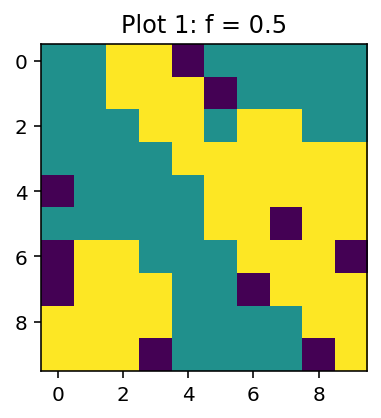

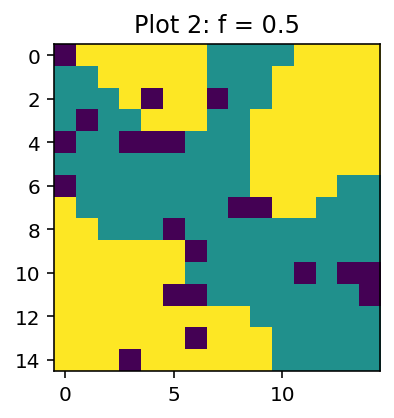

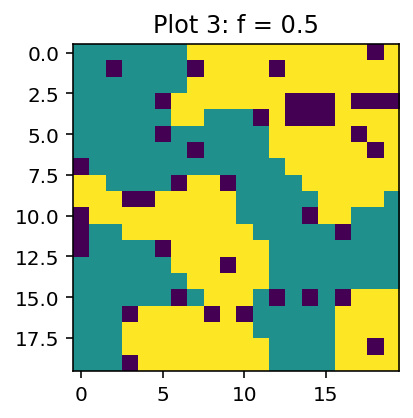

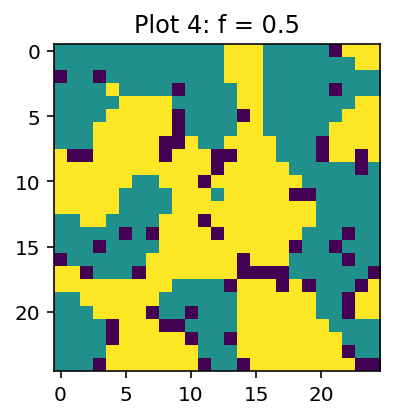

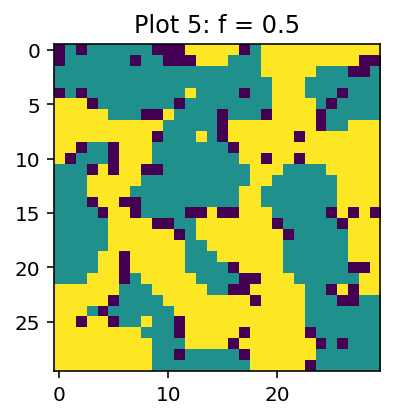

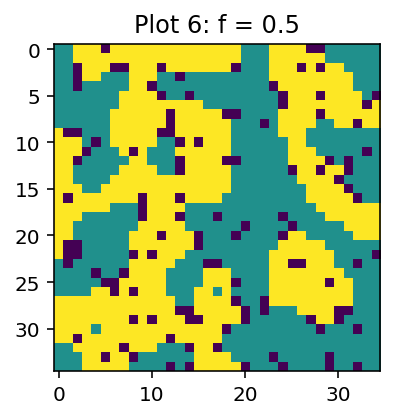

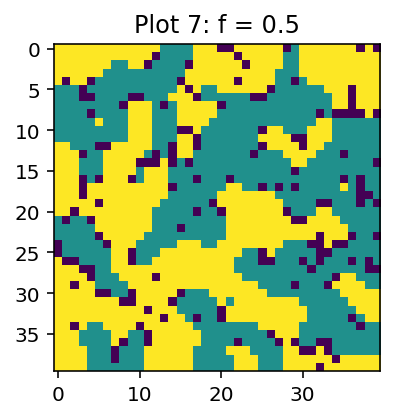

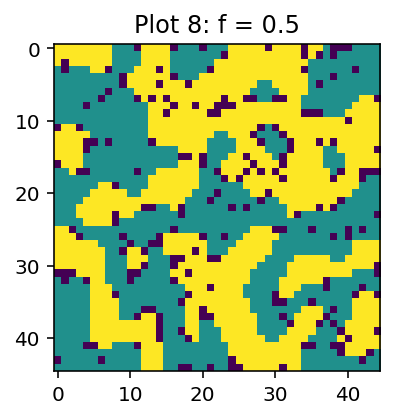

In [15]:
f = 0.5
size = 10
plot_num1 = 1
while size < 50:
    t = initialise_grid(size, size*size*0.45)
    c = 0
    while c < 10:
        t = advance(t, f)
        c += 1
    plt.figure(figsize = (3,3))
    plt.imshow(t)
    plt.title("Plot " + str(plot_num1) + ": f = " + str(round(f, 3)))
    plt.show()
    size += 5
    plot_num1 += 1


If you look at the figures above, you have 8 plots which depict different patterns of the distribution with the varying size of the grid, with a constant increment and a constant f.

First of all, as is clearly depicted by the plots, the stability of the distribution does not seem to vary with the size of the grid; as the grid is increased the patterns stay constantly stable. Additionally, what the size difference does is create a higher probability of the creation of different clusters of the same species if the right f is chosen.



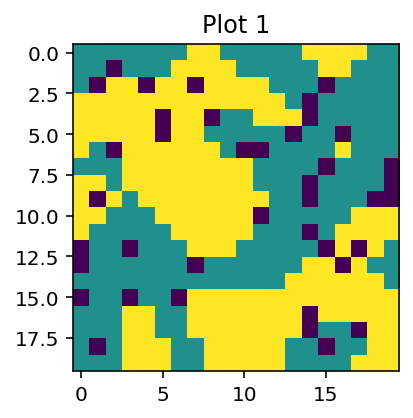

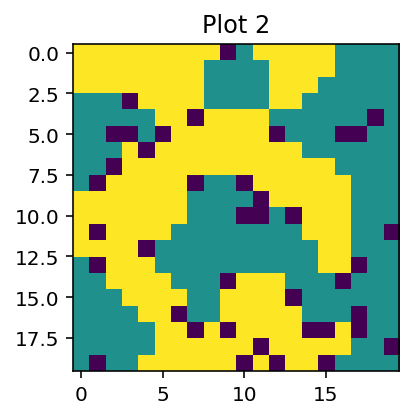

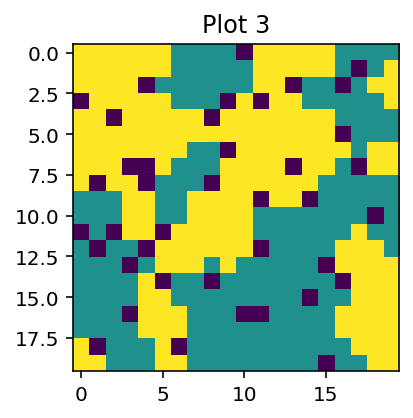

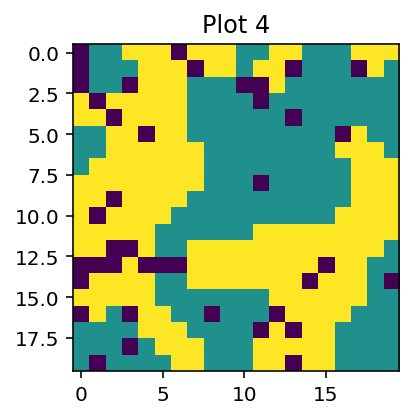

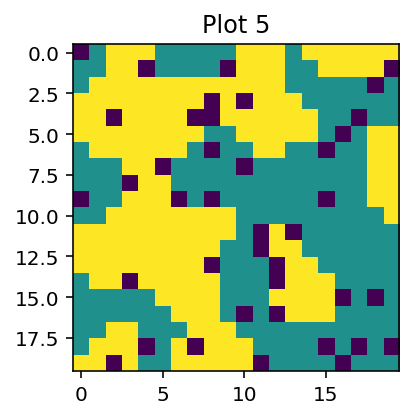

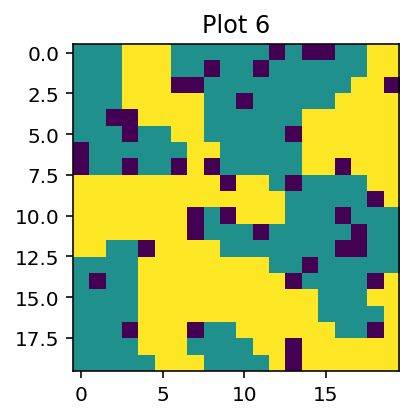

In [27]:
k = 0
plot_num = 1
 
while k < 6:
    t = initialise_grid(20,180)
    c = 0
    while c < 10:
        t = advance(t, 0.4)
        c += 1
   
    plt.figure(figsize = (3,3))
    plt.imshow(t)
    plt.title("Plot " + str(plot_num))
    plot_num += 1
    k += 1

If you look at the figures above, you have 6 plots which depict different end results of a distribution with a varied initial array. For each plot the array has been randomly generated and a constant grid size and f were used.

From these plots, it seems that the initial distribution does not have an affect on the stability of the pattern; if the right f is chosen with a completely random initial array, it still seems to reach a stable pattern. The only affect the initial array might have is how fast the distribution reaches the stable structure, meaning some might require more iterations to reach stability than others due to a more heterogenous initial distribution.
